# Emotion Detection from scratch

**Author:** Yash Kumar <br>
**Linkedin:** https://www.linkedin.com/in/yash-kumar-01573a153/ <br>
**Date created:** 07-August-2024<br>
**Description:** Training an image classifier from scratch on the Kaggle FER-2013 Dataset.

# Data Set-

Kaggle - https://www.kaggle.com/datasets/msambare/fer2013

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories.

(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)


# Setting up Kaggle Directory

In [ ]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 93% 56.0M/60.3M [00:00<00:00, 157MB/s]
100% 60.3M/60.3M [00:00<00:00, 143MB/s]


In [ ]:
!unzip /content/fer2013.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/sad/Training_65242339.jpg  
  inflating: /content/train/sad/Training_65267116.jpg  
  inflating: /content/train/sad/Training_65275626.jpg  
  inflating: /content/train/sad/Training_6529266.jpg  
  inflating: /content/train/sad/Training_65329617.jpg  
  inflating: /content/train/sad/Training_65338712.jpg  
  inflating: /content/train/sad/Training_65338797.jpg  
  inflating: /content/train/sad/Training_65387162.jpg  
  inflating: /content/train/sad/Training_65404494.jpg  
  inflating: /content/train/sad/Training_65426218.jpg  
  inflating: /content/train/sad/Training_65430136.jpg  
  inflating: /content/train/sad/Training_65437377.jpg  
  inflating: /content/train/sad/Training_6545735.jpg  
  inflating: /content/train/sad/Training_65463385.jpg  
  inflating: /content/train/sad/Training_65473985.jpg  
  inflating: /content/train/sad/Training_65502829.jpg  
  inflating: /content/train/sad/Training_65505359.jpg  

# Installing Packages

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import cv2
import tensorflow as tf
from PIL import Image
import imghdr

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

# Setting up Directory to save model data.

In [ ]:
project_name='FER_2013_emotion_detection'
model_name=['Custom_CNN_from_scratch',
            'Custom_CNN_with_augmentation',
            'Vgg16_transfer_learning',
            'Resnet50_transfer_learning']
base_dir='/content/'
project_dir=os.path.join(base_dir,project_name)
os.makedirs(project_dir,exist_ok=True)
for model in model_name:
  model_dir=os.path.join(project_dir,model)
  os.makedirs(model_dir,exist_ok=True)

# Data Cleaning

In [ ]:
img_exist=['jpeg','jpg','png']
data_dir='/cont/train'
for root,dir,files in os.walk(data_dir):
  for file in files:
    file_path=os.path.join(root,file)
    try:
      file_type=os.imghdr.what(file_path)
      if file_type not in img_exist:
        os.remove(file_path)
      else:
        img=cv2.imread(file_path)
    except:
      os.remove(file_path)

# Data Analysis

In [ ]:
def count_dir_item(dir,name):
  count_item={}
  for item in os.listdir(dir):
    item_path=os.path.join(dir,item)
    if os.path.isdir(item_path):
      count_item[item]=len(os.listdir(item_path))
  df=pd.DataFrame(count_item,index=[name])
  return df
train_dir='/content/train'
test_dir='/content/test'
train_count=count_dir_item(train_dir,'train')
test_count=count_dir_item(test_dir,'test')
print(train_count)
print(test_count)

       surprise  neutral   sad  angry  fear  happy  disgust
train      3171     4965  4830   3995  4097   7215      436
      surprise  neutral   sad  angry  fear  happy  disgust
test       831     1233  1247    958  1024   1774      111


## Visualization

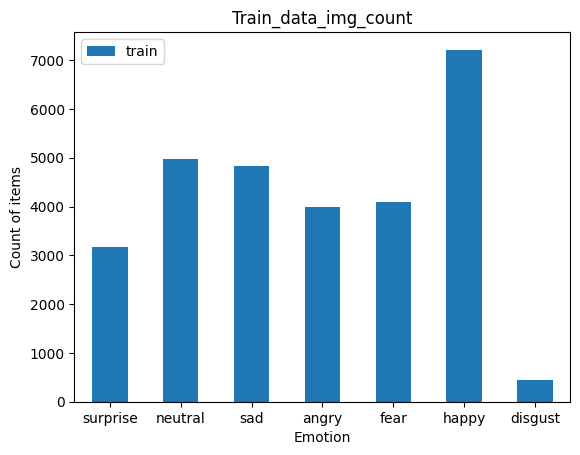

In [ ]:
train_count.transpose().plot(kind='bar')
plt.title('Train_data_img_count')
plt.xticks(rotation=0)
plt.xlabel('Emotion')
plt.ylabel('Count of items')
plt.show()

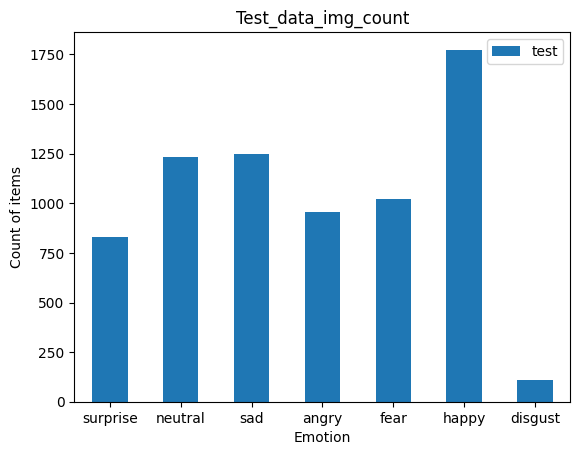

In [ ]:
test_count.transpose().plot(kind='bar')
plt.title('Test_data_img_count')
plt.xticks(rotation=0)
plt.xlabel('Emotion')
plt.ylabel('Count of items')
plt.show()

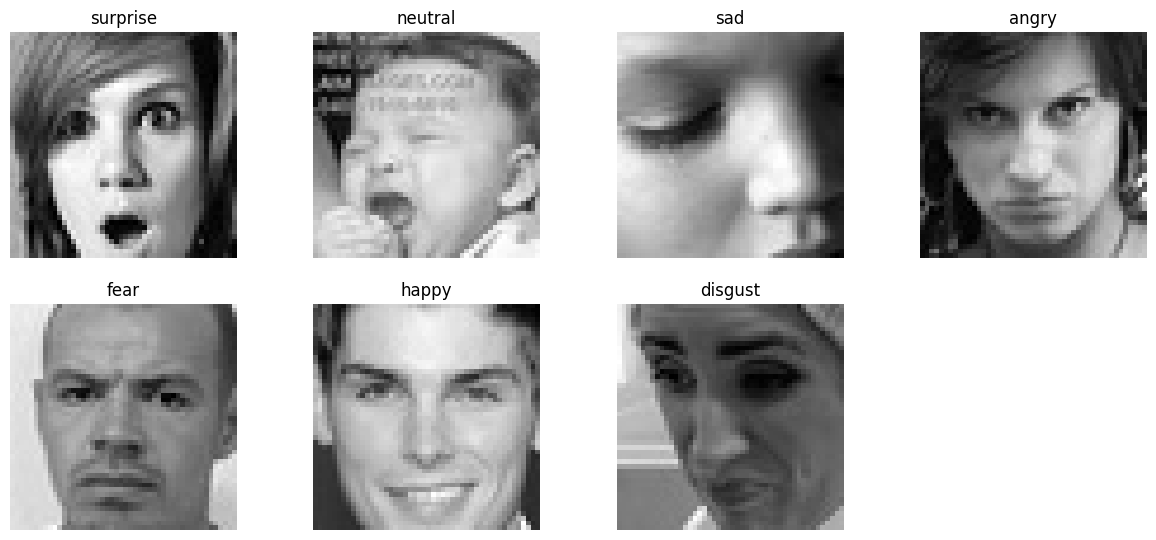

In [ ]:
emotions=os.listdir(train_dir)
plt.figure(figsize=(15,10))
emotions
for i,emotion in enumerate(emotions,1):
  folder_path=os.path.join(train_dir,emotion)
  img_path=os.path.join(folder_path,os.listdir(folder_path)[random.randint(0,400)])
  img=plt.imread(img_path)
  plt.subplot(3, 4, i)
  plt.imshow(img, cmap='gray')
  plt.title(emotion)
  plt.axis('off')

In [ ]:
def plot_img_dir(dir,class_name,num=9):
  if len(os.listdir(dir))<num:
    return 'You asked too much images from dir that much images is not there'
  else:
    sel_img=random.sample(os.listdir(dir),num)
    fig,axes=plt.subplots(3,3,figsize=(5,5))
    axes=axes.ravel()
    for i,img in enumerate(sel_img):
      img_path=os.path.join(dir,img)
      img=load_img(img_path)
      axes[i].imshow(img)
      axes[i].set_title(f'Image: {class_name}')
      axes[i].axis('off')
  plt.tight_layout()
  plt.show()


In [ ]:
def print_img(name):
  class_path='/content/train/'+name
  return plot_img_dir(class_path,name,9)

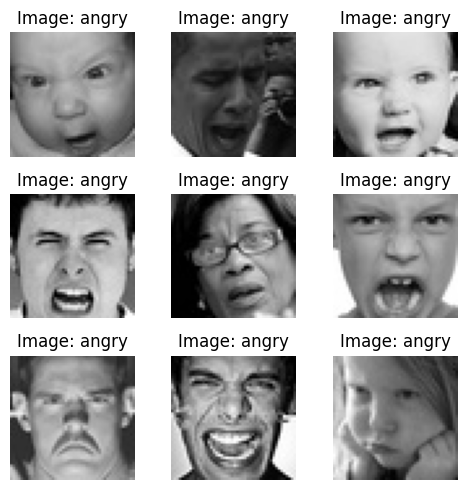

None


In [ ]:
print(print_img('angry'))

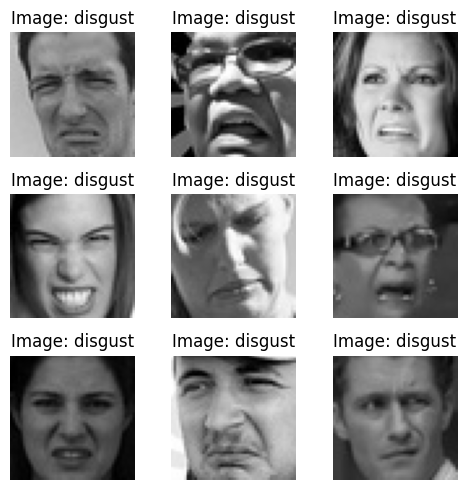

In [ ]:
print_img('disgust')

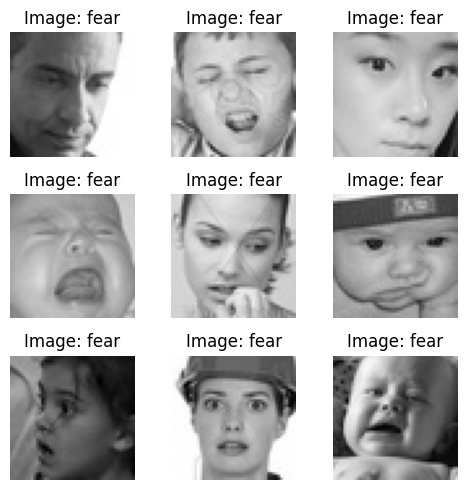

In [ ]:
print_img('fear')

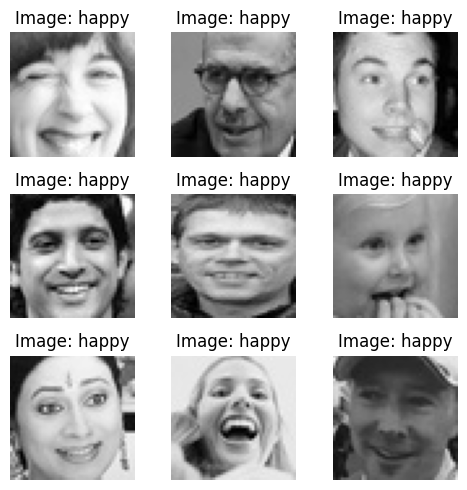

In [ ]:
print_img('happy')

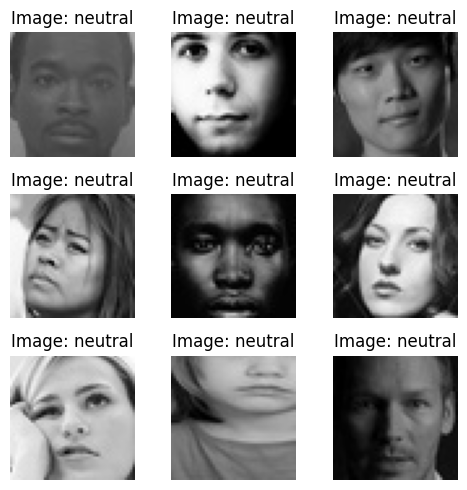

In [ ]:
print_img('neutral')

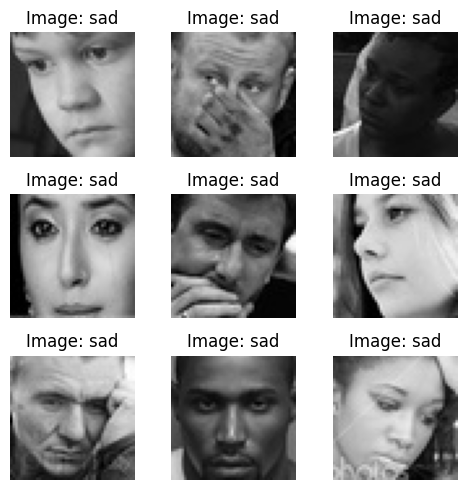

In [ ]:
print_img('sad')

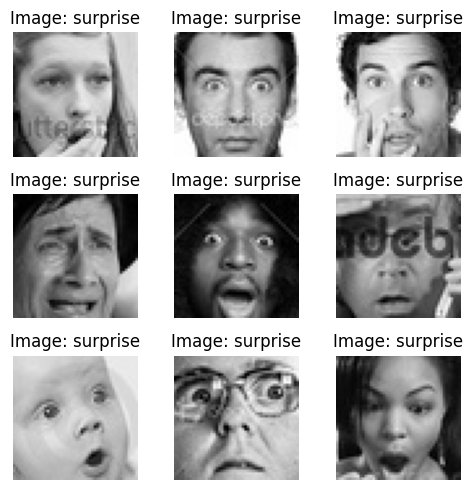

In [ ]:
print_img('surprise')

# Checking shapes and channels.

In [ ]:
img_path='/content/train/angry/Training_10118481.jpg'
import cv2
img=cv2.imread(img_path)
if img is not None:
  print(img.shape)
else:
  print('Issue in path')

(48, 48, 3)


In [ ]:
img_path='/content/train/angry/Training_10118481.jpg'
import cv2
img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
if img is not None:
  print(img.shape)
else:
  print('Issue in path')

(48, 48)


# Model 1 : Custom CNN from Scratch

## Initializing the ImageGenerators